In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 데이터 다운로드

In [ ]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

# 유저들에게 가장 인기있는 감독 10명이 선호하는 장르와, 전체 감독의 장르 선호도 비교

In [ ]:
director_df = pd.merge(train_df, director_data, on=['item'])
director_id = director_df.value_counts('director').index[:10]

<BarContainer object of 18 artists>

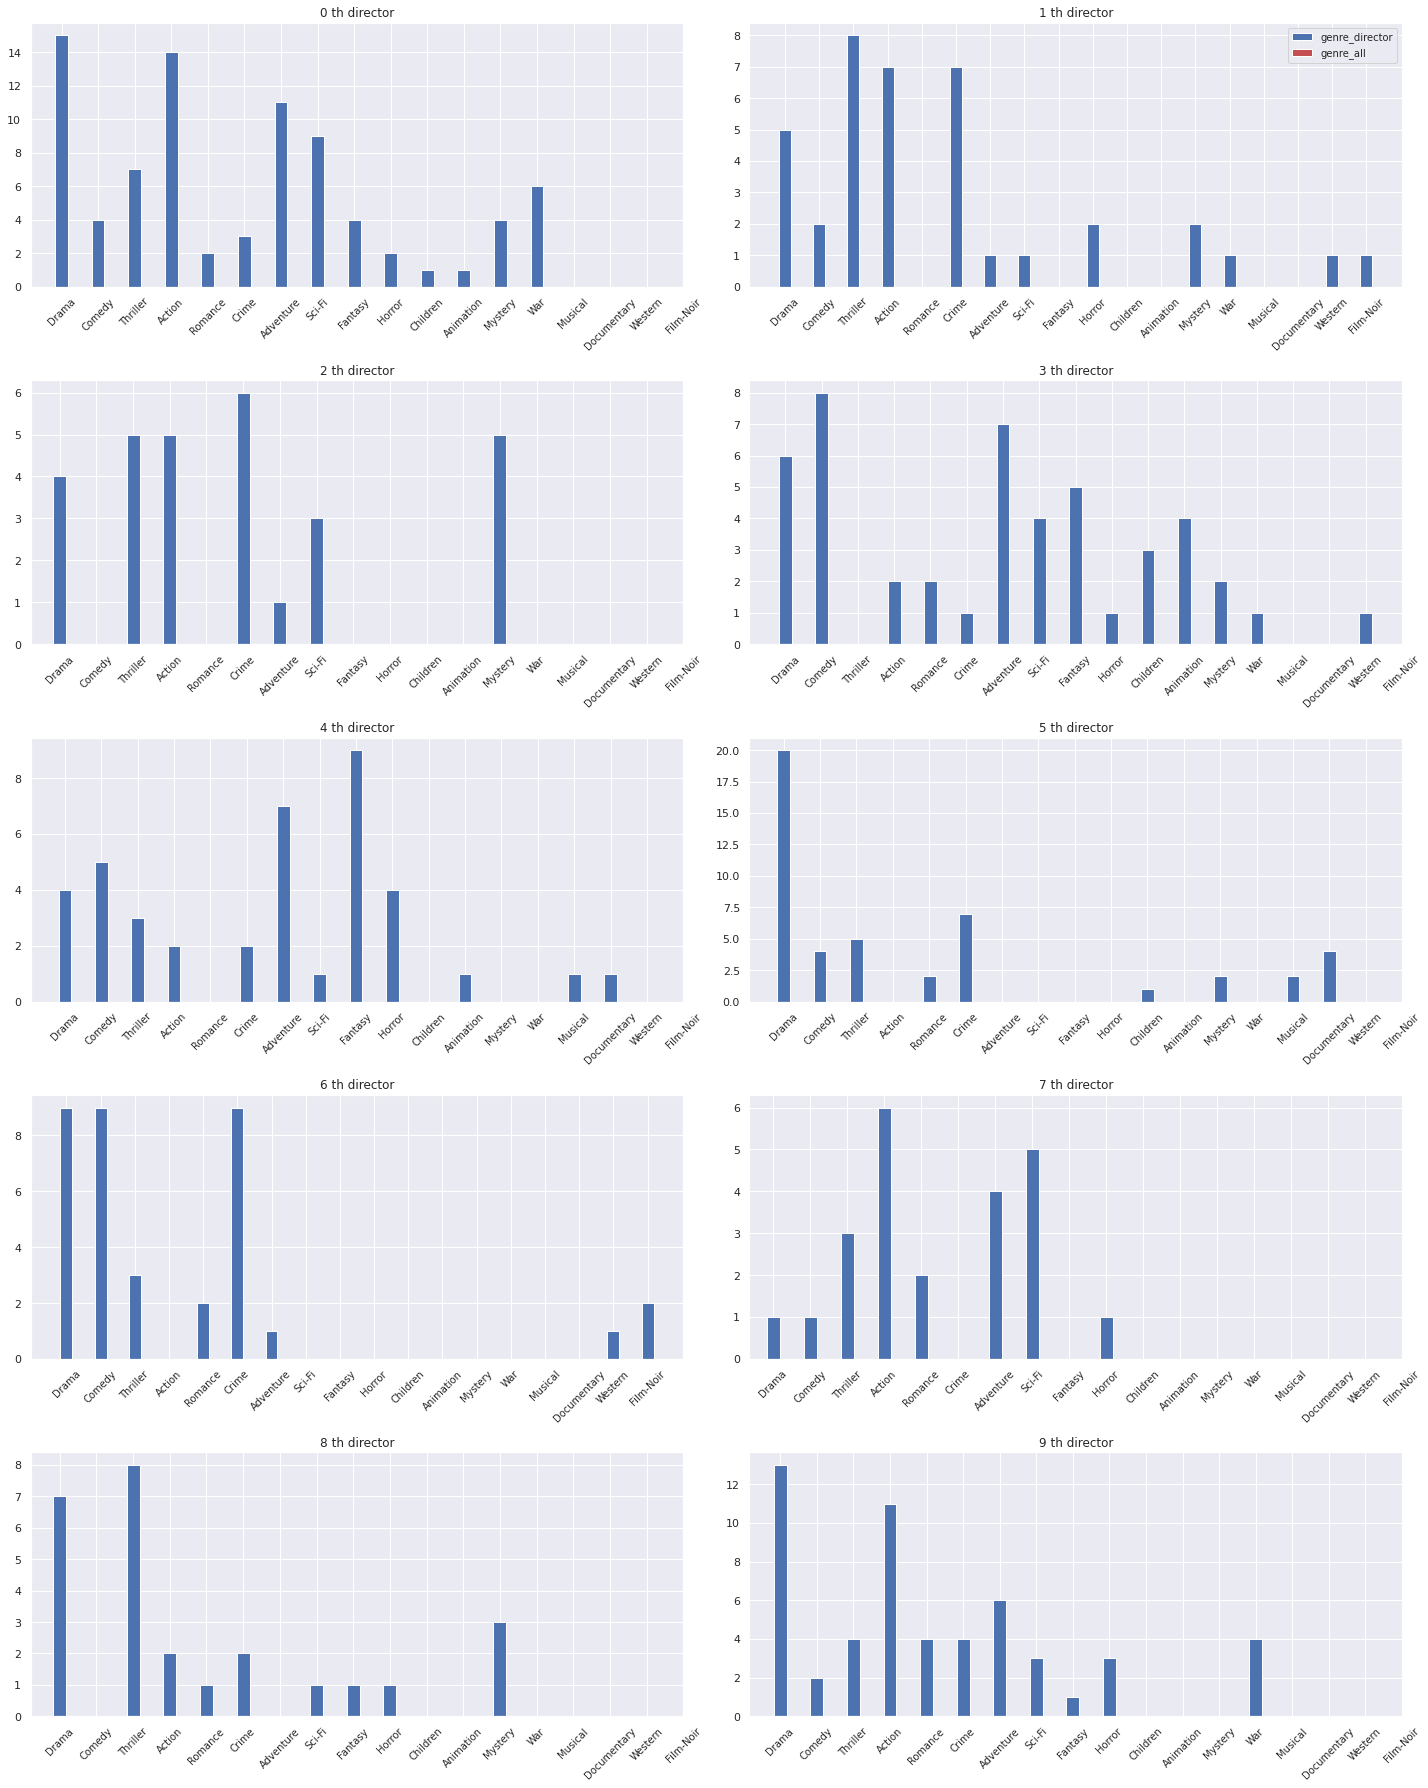

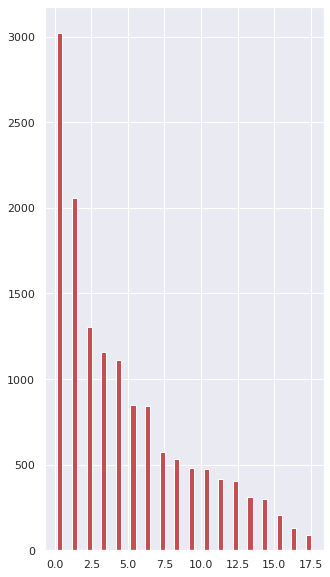

In [ ]:
### 유저들에게 가장 인기있는 감독10명이 선호하는 장르와, 전체 감독의 장르 선호도 비교
genre_direc= pd.merge(director_data,genre_data, on=['item'])
side_df = []
# director_id= 유저들에게 가장 인기있는 감독 10명/의 데이터만 추출
for director in director_id:
    side_df.append(genre_direc.loc[genre_direc['director'] == director])

genre_direc_top = pd.concat(side_df)

label = list(genre_direc['genre'].value_counts().index)
index = np.arange(len(label))

plt.figure(figsize=(20,25))

for i in range(10):
    plt.subplot(5,2,i+1)

    di = director_id[i]
    genre_user = genre_direc_top[genre_direc_top['director'] == di]
    comp= pd.merge(pd.DataFrame(genre_direc['genre'].value_counts()).reset_index(),
pd.DataFrame(genre_user['genre'].value_counts()).reset_index(), 
how='left',on=['index'])
    comp.fillna(0)

    p1= plt.bar(index,comp['genre_y'],0.35,color='b')

    plt.title(f'%d th director'%i)
    plt.xticks(index, label, fontsize=10,rotation=45)
    plt.tight_layout()
    if i==1:
        plt.legend((p1[0], p2[0]), ('genre_director', 'genre_all'), fontsize=10)
plt.figure(figsize=(5,10))
plt.bar(index+0.35,comp['genre_x'], 0.35,color='r')

-> 유저에게 인기있는 감독이 선호하는 영화 장르는 불규칙적으로 어떠한 패턴을 찾아볼 수 없었습니다.